# Build and Evaluate Classifier for Customore Credit card defaulting

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#import credit file
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
#sample for processing
credit = credit.sample(n=2000,replace =False,random_state=1)

In [5]:
credit.index = credit['ID']

In [6]:
credit.drop('ID',axis=1,inplace=True)

In [7]:
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
credit['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

In [9]:
credit['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

In [10]:
credit = credit.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
credit.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
10748     310000    1          3         1   32      0      0      0      0   
12574      10000    2          3         1   49     -1     -1     -2     -1   
29677      50000    1          2         1   28     -1     -1     -1      0   
8857       80000    2          3         1   52      2      2      3      3   
21099     270000    1          1         2   34      1      2      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574      2  ...       1690       1138        930         0         0   
29677     -1  ...      45975       1300      43987         0     46257   
8857       3  ...      40748      39816      40607      3700      1600   
21099      2  ...      22448      15490      17343         0      4000   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
ID                                                      
10748      4000      3000      1000      2000        0  
12574      2828         0       182         0        1  
29677      2200      1300     43987      1386        0  
8857       1600         0      1600      1600        1  
21099      2000         0      2000      2000        0  

[5 rows x 24 columns]

## Exploratory Data Analysis

In [11]:
credit.head()
credit.describe()
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')


In [12]:
#Correlation Matrix
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1  \
LIMIT_BAL   1.000000  0.040771  -0.199087 -0.139275  0.138840 -0.274978   
SEX         0.040771  1.000000   0.014441 -0.040209 -0.083535 -0.083759   
EDUCATION  -0.199087  0.014441   1.000000 -0.139183  0.161365  0.120761   
MARRIAGE   -0.139275 -0.040209  -0.139183  1.000000 -0.405739  0.024723   
AGE         0.138840 -0.083535   0.161365 -0.405739  1.000000 -0.043785   
PAY_1      -0.274978 -0.083759   0.120761  0.024723 -0.043785  1.000000   
PAY_2      -0.288998 -0.120320   0.140661  0.016416 -0.026144  0.663725   
PAY_3      -0.297679 -0.096795   0.129908  0.024036 -0.030219  0.586904   
PAY_4      -0.274531 -0.095600   0.133892  0.003675 -0.017858  0.563806   
PAY_5      -0.256782 -0.120186   0.124966  0.003836 -0.018790  0.543924   
PAY_6      -0.245735 -0.080590   0.098830  0.007402 -0.025176  0.494823   
BILL_AMT1   0.314470 -0.019495   0.047929 -0.028975  0.053550  0.169398   
BILL_AMT2   0.289101 -0.0

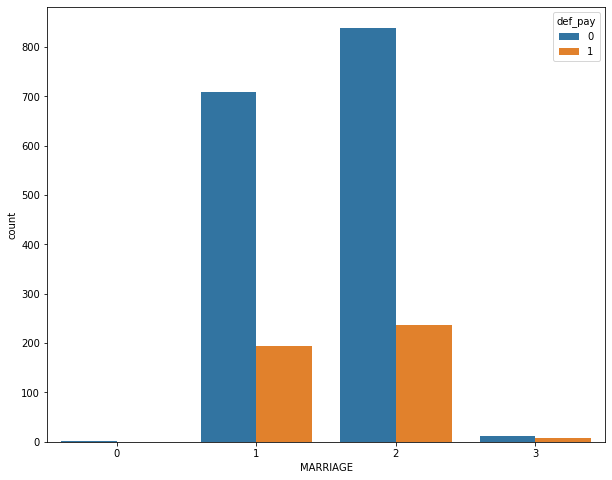

In [13]:
g=sns.countplot(x="MARRIAGE", data=credit,hue="def_pay")

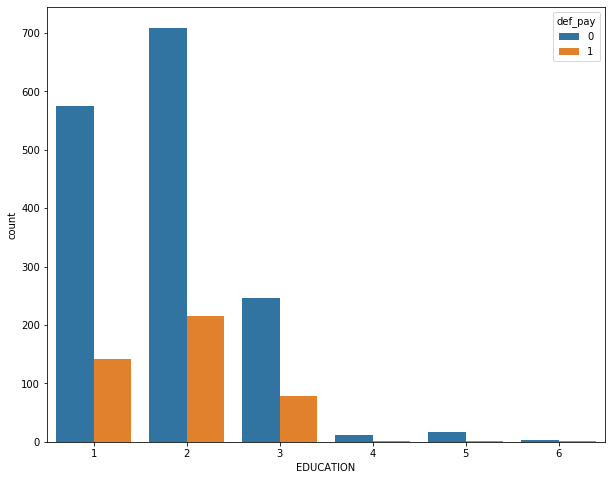

In [14]:

g=sns.countplot(x="EDUCATION", data=credit,hue="def_pay")

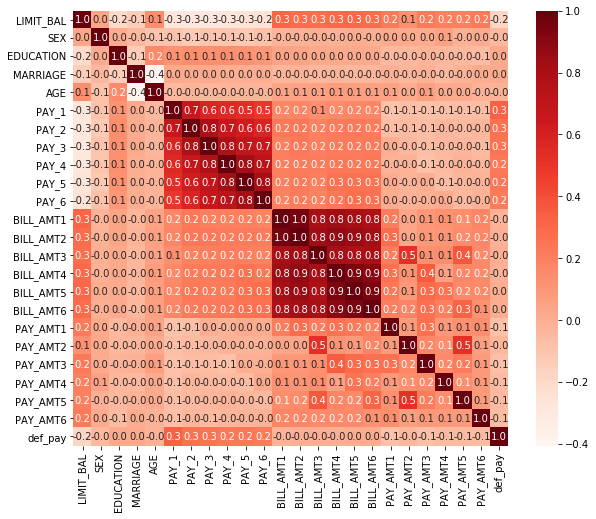

In [15]:
#Correlation Plotted
sns.heatmap(corrMat, square=True, annot=True, fmt=".1f", cmap=plt.cm.Reds)

In [16]:
#Covariance Estimation
covMat = credit.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.731828e+10  2625.837919 -20922.186093 -9472.611306   
SEX        2.625838e+03     0.239511      0.005644    -0.010170   
EDUCATION -2.092219e+04     0.005644      0.637710    -0.057444   
MARRIAGE  -9.472611e+03    -0.010170     -0.057444     0.267109   
AGE        1.670877e+05    -0.373861      1.178415    -1.917649   
PAY_1     -3.994526e+04    -0.045249      0.106452     0.014105   
PAY_2     -4.425436e+04    -0.068519      0.130706     0.009872   
PAY_3     -4.613548e+04    -0.055789      0.122175     0.014630   
PAY_4     -4.215235e+04    -0.054588      0.124751     0.002216   
PAY_5     -3.836793e+04    -0.066783      0.113307     0.002251   
PAY_6     -3.772246e+04    -0.046007      0.092062     0.004462   
BILL_AMT1  3.173152e+09  -731.554952   2934.762332 -1148.239902   
BILL_AMT2  2.775763e+09  -541.445836   2639.622073 -1005.036016   
BILL_AMT3  2.888311e+09   -80.339765   1705.529420 -1498.18116

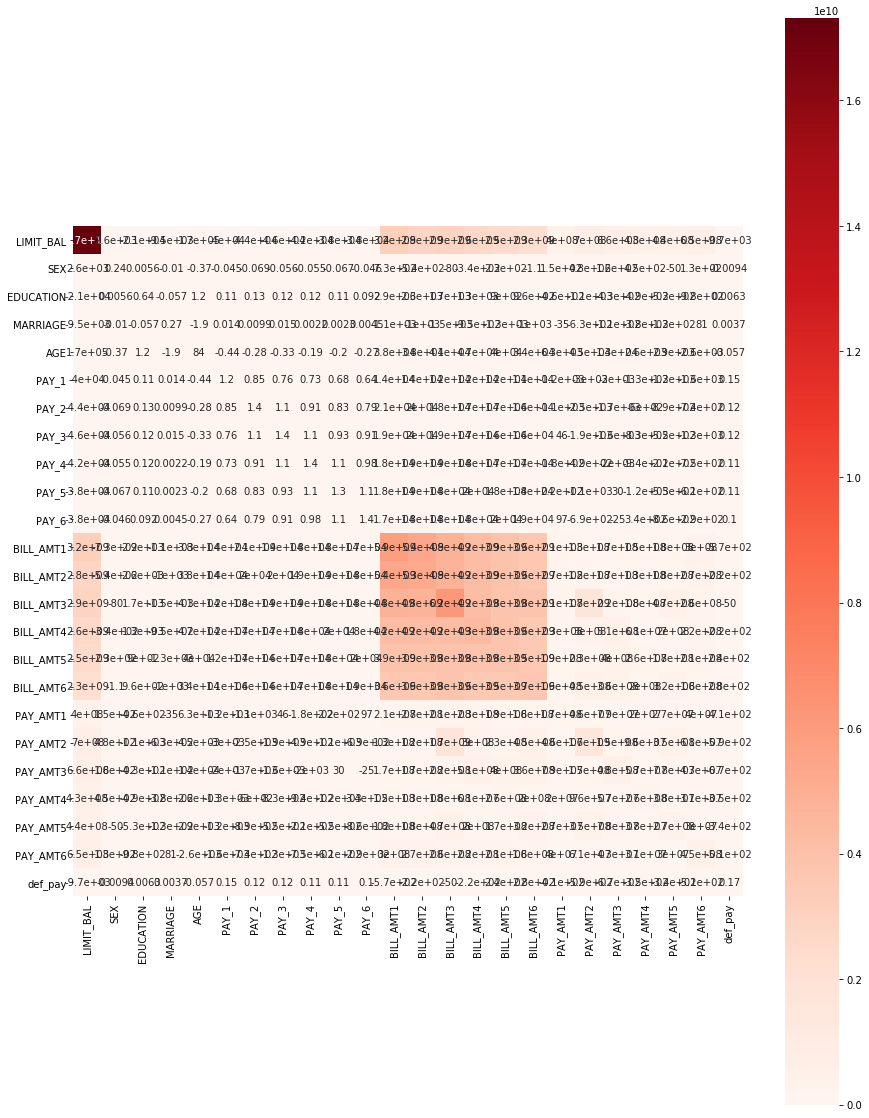

In [17]:
#Covariance Plotted
pylab.rcParams['figure.figsize'] = (15.0, 20.0)
sns.heatmap(covMat,  square=True, annot=True, cmap=plt.cm.Reds)
pylab.rcParams['figure.figsize'] = (15.0, 12.0)

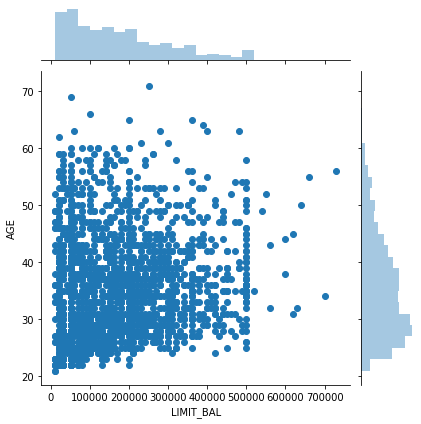

In [18]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=credit,kind="scatter")

## Pre-process

#consolidate others in Education
fil = (credit.EDUCATION == 5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit.EDUCATION.value_counts()

#assume 0 value to be single for Marriage attribute
credit.loc[credit.MARRIAGE == 0, 'MARRIAGE'] = 2
credit.MARRIAGE.value_counts()

In [19]:
#null values removed if any
x = credit.isnull()
x.describe()
credit.dropna()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
10748     310000    1          3         1   32      0      0      0      0   
12574      10000    2          3         1   49     -1     -1     -2     -1   
29677      50000    1          2         1   28     -1     -1     -1      0   
8857       80000    2          3         1   52      2      2      3      3   
21099     270000    1          1         2   34      1      2      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
23296     160000    2          1         2   25     -1      0     -1     -1   
15149     250000    1          1         1   53     -2     -2     -2     -2   
18667      50000    2          1         2   23     -1     -1     -2     -2   
3416      200000    2          2         1   37      0      0      0      0   
18715     420000    2          1         2   28      0      0     -1      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574      2  ...       1690       1138        930         0         0   
29677     -1  ...      45975       1300      43987         0     46257   
8857       3  ...      40748      39816      40607      3700      1600   
21099      2  ...      22448      15490      17343         0      4000   
...      ...  ...        ...        ...        ...       ...       ...   
23296      0  ...       2199      10856          0      1000     11426   
15149     -2  ...          0          0          0         0         0   
18667     -2  ...          0          0          0         0         0   
3416       0  ...     191730     171269     151550      8017      8000   
18715      0  ...      65592      57438      31029      1010     64513   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
ID                                                      
10748      4000      3000      1000      2000        0  
12574      2828         0       182         0        1  
29677      2200      1300     43987      1386        0  
8857       1600         0      1600      1600        1  
21099      2000         0      2000      2000        0  
...         ...       ...       ...       ...      ...  
23296      2199     10000         0      9867        0  
15149         0         0         0         0        1  
18667         0         0         0         0        0  
3416       8000      9000      7000      6000        0  
18715      2420      1473      1062      1022        0  

[2000 rows x 24 columns]

Also due to some covariance to Bill Amount and Correlation of BILL_AMT attributes, part of the BILL_AMT columns were removed.

In [20]:
credit = credit.drop('BILL_AMT2',1)
credit = credit.drop('BILL_AMT4',1)
credit = credit.drop('BILL_AMT6',1)

## Selecting and Dividing the data

In [21]:
## Train and Test models

In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10748 to 18715
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  2000 non-null   int64
 1   SEX        2000 non-null   int64
 2   EDUCATION  2000 non-null   int64
 3   MARRIAGE   2000 non-null   int64
 4   AGE        2000 non-null   int64
 5   PAY_1      2000 non-null   int64
 6   PAY_2      2000 non-null   int64
 7   PAY_3      2000 non-null   int64
 8   PAY_4      2000 non-null   int64
 9   PAY_5      2000 non-null   int64
 10  PAY_6      2000 non-null   int64
 11  BILL_AMT1  2000 non-null   int64
 12  BILL_AMT3  2000 non-null   int64
 13  BILL_AMT5  2000 non-null   int64
 14  PAY_AMT1   2000 non-null   int64
 15  PAY_AMT2   2000 non-null   int64
 16  PAY_AMT3   2000 non-null   int64
 17  PAY_AMT4   2000 non-null   int64
 18  PAY_AMT5   2000 non-null   int64
 19  PAY_AMT6   2000 non-null   int64
 20  def_pay    2000 non-null   int64
dtypes: int64(

In [23]:
#dependant and independant variables
features = credit.iloc[:,:-1].values
depVar = credit.iloc[:,-1].values

In [24]:
print(features)

[[310000      1      3 ...   3000   1000   2000]
 [ 10000      2      3 ...      0    182      0]
 [ 50000      1      2 ...   1300  43987   1386]
 ...
 [ 50000      2      1 ...      0      0      0]
 [200000      2      2 ...   9000   7000   6000]
 [420000      2      1 ...   1473   1062   1022]]


In [25]:
print(depVar)

[0 1 0 ... 0 0 0]


In [26]:
y_train = depVar

In [27]:
X_train = features

In [28]:
#split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.3,random_state = 1)
X_train.shape, X_test.shape

((1400, 20), (600, 20))

In [29]:
y_train.shape, y_test.shape

((1400,), (600,))

In [30]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
X_train

array([[100000,      1,      1, ...,      0,   2712,      0],
       [130000,      2,      2, ...,      0,      0,      0],
       [340000,      1,      2, ...,  11610,   5000,   2971],
       ...,
       [ 50000,      2,      2, ...,      0,      0,      0],
       [100000,      1,      2, ...,    480,    390,    390],
       [ 50000,      1,      2, ...,    430,    350,   3581]], dtype=int64)

## Classifiers

## Random Forest Classifier with tuning

In [32]:
#import and define RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [33]:
#Grid search for tuning
param_grid_rf = {'n_estimators': [200, 400, 600], 
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [34]:
#Accuray on Cross Validation
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8221428571428572


In [35]:
#tuned parameters
best_parameters = grid_search_rf.best_params_
best_parameters

{'class_weight': None, 'n_estimators': 200}

In [36]:
#Make Predictions
pred_rf = grid_search_rf.predict(X_test)
predRsquared = r2_score(y_test,pred_rf)
rmse = sqrt(mean_squared_error(y_test, pred_rf))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.099
RMSE: 0.428


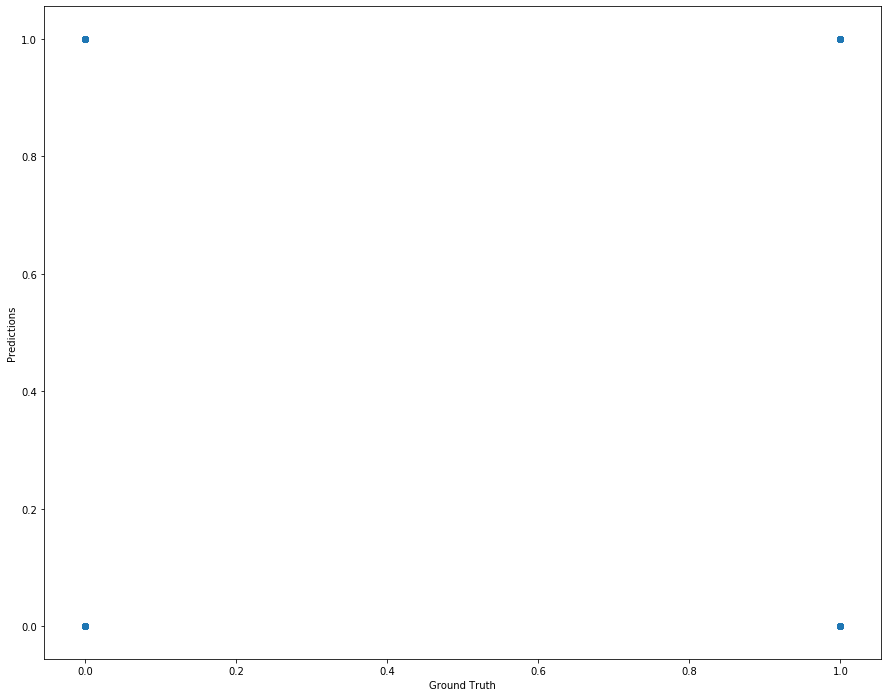

In [37]:
plt.scatter(y_test, pred_rf, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [64]:
acc = accuracy_score(y_test, pred_rf)
print('Accuracy: %.3f' % acc)

Accuracy: 0.817


## Decision Tree Classification 


In [40]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [41]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [42]:
y_pred = dct.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[392,  81],
       [ 76,  51]], dtype=int64)

In [44]:
predRsquared = r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.568
RMSE: 0.512


In [65]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.738


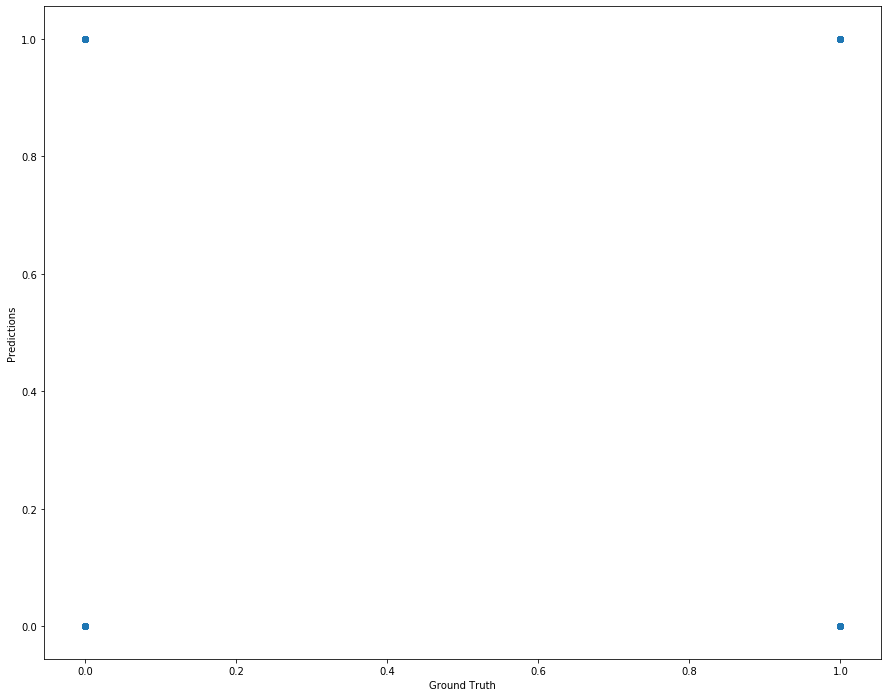

In [45]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## SVC Classification with gridsearch

In [57]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', 
          class_weight='balanced')

In [58]:
from sklearn.model_selection  import GridSearchCV
svc = SVC(class_weight='balanced', random_state=1)
search_space = {'C': np.logspace(-3, 3, 7)}
gridsearch = GridSearchCV(svc, 
                          param_grid=search_space, 
                          scoring='accuracy', 
                          refit=True, cv=10)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [59]:
cv = gridsearch.best_score_
test_score = gridsearch.score(X_train, y_train)
best_c =  gridsearch.best_params_['C']

In [60]:
print('CV accuracy score: %0.3f' % cv)
print('Test accuracy score: %0.3f' % test_score)
print('Best C parameter: %0.1f' % best_c)

CV accuracy score: 0.730
Test accuracy score: 0.777
Best C parameter: 0.0


In [62]:
#Make Predictions
pred_svc = gridsearch.predict(X_test)
predRsquared = r2_score(y_test,pred_rf)
rmse = sqrt(mean_squared_error(y_test, pred_svc))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.099
RMSE: 0.460


In [66]:
acc = accuracy_score(y_test, pred_svc)
print('Accuracy: %.3f' % acc)

Accuracy: 0.788


## Random Forest, Decision Tree and Support Vector Machine comparions

Random Forest gives the best model Accuracy value of 0.817. Also has the lowest RMSE with 0.428 value.

Smaller sample size was chosen to small due to the constraints of computer processing power. Expanding the sample size we might see better results.